This notebook will be used to document my work in doing initial exploratory data analysis for the house prices data set. This will help to potentially inform feature creation/selection and ultimately our process in training and validating our chosen model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


The data set contains about 1500 observations in the training and (almost) the same amount in the test set. There are 80 included explanatory variables. SalePrice is the dependent variable we are interested in modelling so let's investigate that.

In [4]:
#Importing some other stats to help us
from scipy.stats import skew, pearsonr

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
1.880940746034036


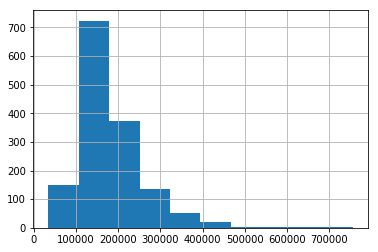

In [5]:
price = train['SalePrice']
print(price.describe())
print(skew(price))
price.hist()

The house prices have a positive skew, this can easily be easily dealt with using a log transformation. In fact, the competition metric uses log prices so that's a pretty handy hint!

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64
0.1212103673013655


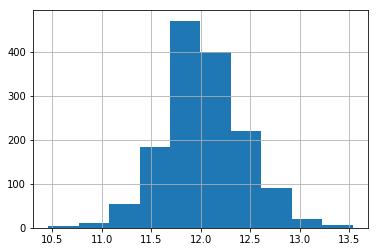

In [6]:
print(np.log(price).describe())
print(skew(np.log(price)))

np.log(price).hist()


Now, let's look at the types of explanatory variables included in the data set. It will most likely be a mixture of numerical and categorical variables.

In [7]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


Note that according to the data description, MSSubClass should actually be a categorical variable, not a numerical one. We'll need to convert it, but let's look at the countplot first.

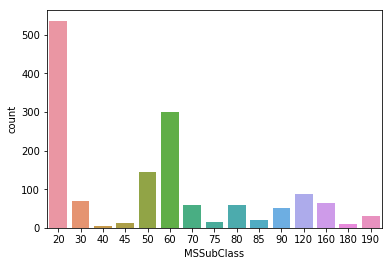

In [8]:
sns.countplot(x='MSSubClass',data=train)

In [9]:
train['MSSubClass'] = train['MSSubClass'].apply(str)

Real life data is bound to have missing values, and this data set is no exception. 

In [10]:
na_count = train.isnull().sum().sort_values(ascending=False)
na_count

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

Remarkably well behaved! There are four main offenders when it comes to missing values, PoolQC, MiscFeature, Alley and Fence. 

For PoolQC, the data description tells us that a value of NA means that the house doesn't have a pool. Most houses don't actually have pools, so it makes sense to see a large number of NAs, however it is important to note that the data itself isn't actually missing but rather that the house doesn't actually have a pool. This is also the case for the other categorical variables, an NA value simply means that the house doesn't have the item in question. E.g. for Alley, an NA value simply means that the house does not have alley access. So the NA values can be thought of as a category in their own right. Given this, if you plan to transform your categorical variables using one-hot encoding, it doesn't matter how you deal with the NAs. They will be included as their own category either implicitly or explicitly. While explicitly creating a category for NAs will cause perfect collinearity for linear regression, if you apply regularisation (in particular l1 regularisation) it shouldn't be a problem. Non-linear methods such as Random Forests or Gradient Boosting will have no problem with this.  

This logic does not apply to LotFrontage and GarageYrBlt. LotFrontage is a continuous variable, I suspect that the missing values in this case are simply because a particular property may not be connected to a street for whatever reason. I think it should be ok to replace it with zeros.

In [ ]:
train['LotFrontage'] = train['LotFrontage'].fillna(0)

For GarageYrBlt I think it's pretty safe to say that NA values are there because the house simply does not have a garage. But we can also verify it.

In [14]:
garage_names = ['GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual']
garage_cols = train[garage_names]
garage_cols[garage_cols['GarageCond'].isna()].head(20)

,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual
39,NaN,NaN,NaN,NaN,0,0,NaN
48,NaN,NaN,NaN,NaN,0,0,NaN
78,NaN,NaN,NaN,NaN,0,0,NaN
88,NaN,NaN,NaN,NaN,0,0,NaN
89,NaN,NaN,NaN,NaN,0,0,NaN
99,NaN,NaN,NaN,NaN,0,0,NaN
108,NaN,NaN,NaN,NaN,0,0,NaN
125,NaN,NaN,NaN,NaN,0,0,NaN
127,NaN,NaN,NaN,NaN,0,0,NaN
140,NaN,NaN,NaN,NaN,0,0,NaN


NaNs for GarageYrBlt line up perfectly with the NaNs for the other garage variables, which means we can conclude that NaNs for GarageYrBlt correspond to a house not having a garage. But how do we deal with this?

This is a bit tricky because it is not a categorical variable which we can create a new category for. Nor is it a numerical values in the usual sense, replacing NaNs with zeros wouldn't be entirely correct. At least with GarageCars and GarageArea, it is actually technically correct to put the value down as zero. A house with no garage has a garage with zero square feet. Putting zero in the year built for the garage would be saying that the garage was built 2000 years ago!

There are a few ways we can deal with the missing data:
1. Delete the Variable
    - An extreme measure considering that very little of the data is actually missing
2. Filling with mean/median
    - I don't think this is entirely correct either because the data isn't actually NA in the sense of being missing, but rather NA in the sense of being not applicable. 
    - It doesn't make sense to ask questions about a particular attribute, if it doesn't exist in the first place.
    - Not a terrible option though, you could do worse, but let's see if we can do better    
3. Replacing with the minimum value in the sample
    - A garage which has been built early is going to be in worse condition in the present day and worth less
    - A house with no garage is going to be worth less than a house with a garage
    - Here we could build a meaningful equivalency between a house with a very old garage (worth very little) and a house with no garage (worth nothing)
4. Create an interaction term between GarageYrBlt and an indicator which is one if the house has a garage, and zero if it does not
    - Functionally, this is identical to replacing missing values with zero which before I argued doesn't make sense
    - However the ultimate goal of this is not necessarily an interpretable estimate, but one that is accurate
    - Perhaps we can slightly forego some interpretability in favour of predictive accuracy?

While I suppose I don't know what the correct answer is, I'm going to go with option 4. and replace the NaNs with zeros.

In [ ]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0) 

The MasVnr variables also contain missing values, and electrical contains one. I'm not going to worry about these ones and use a simple forward fill to fill the na values.

In [17]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(method='ffill') 
train['MasVnrType'] = train['MasVnrType'].fillna(method='ffill') 
train['Electrical'] = train['Electrical'].fillna(method='ffill') 

Now let's move on to univariate visualisations of the other explanatory variables in the data set. There's quite a few, so I'm going to restrict it to what I intuitively consider the most important.

- MSZoning
- LotFrontage
- LotArea
- BldgType
- HouseStyle
- OverallQual
- OverallCond
- YearRemodAdd
- GrLivArea
- Bedroom
- GarageArea

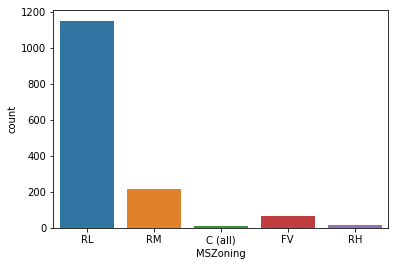

In [21]:
sns.countplot(x='MSZoning',data=train)

MSZoning tells us the sort of zones houses are located in. Not surprisingly most houses are in some form of residential zone (prefixed by R), what is surprising is that most of them are found in low density areas. I would have expected a higher count for high density residential zones. Perhaps this is just a reflection of where the data was collected.

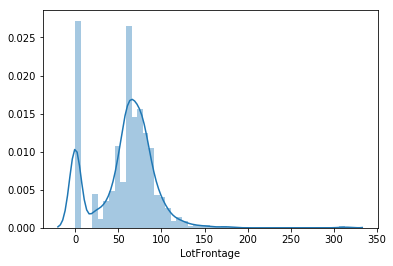

In [23]:
sns.distplot(train['LotFrontage'])

Without the inclusion of zeroes, this has a positively skewed distribution which is to be expected.

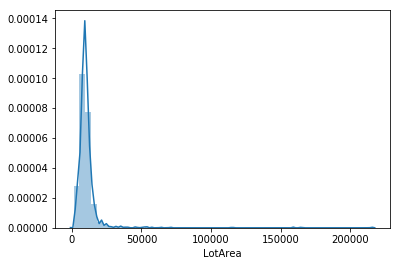

In [24]:
sns.distplot(train['LotArea'])

Same issues of skewness here as well.

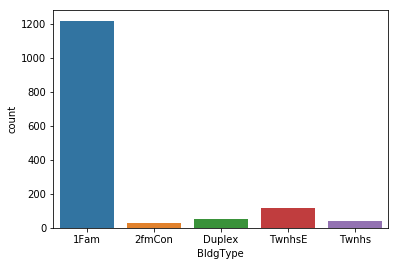

In [26]:
sns.countplot(x='BldgType',data=train)

The vast majority of houses are standalone family homes, not really surprising especially in the west.

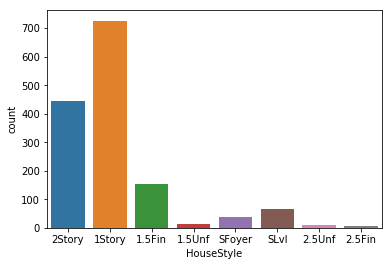

In [27]:
sns.countplot(x='HouseStyle',data=train)

Most houses are either one or two story. Most other variations such as adding an extra half story are uncommon. The fin and unf subscript indicate whether the additional floor is finished or not.

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


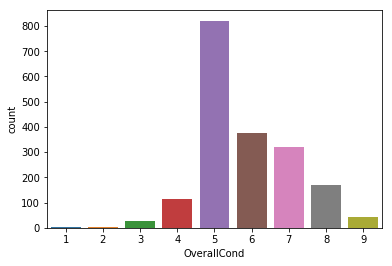

In [30]:
sns.countplot(x='OverallQual',data=train)


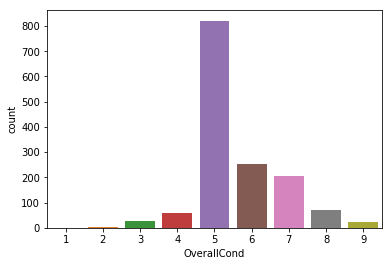

In [31]:
sns.countplot(x='OverallCond',data=train)

Interesting to see that overal quality and overall condition have different distributions, both seem to have regression to the mean. It is much more pronounced in the overall condition variable.

My hypothesis is that houses initially in good condition are neglected until they become unbearable, and maintained with a minimum effort to avoid offending the senses. Houses do not rise toward excellent levels of maintenance because there is not that much benefit to the owner in the short term.

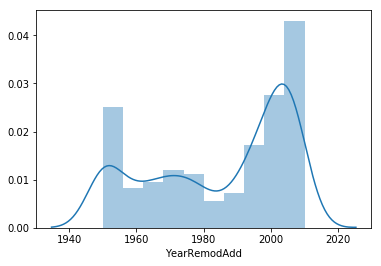

In [33]:
sns.distplot(train['YearRemodAdd'])

This appears to be a bimodal distribution with a large amount of houses built in the post WW2 area and a large amount being remodelled/built in the 2000s. In particular, this boom may have been driven by population growth and potentially increased demand for houses to fuel the creation of mortgage backed securities leading up to the GFC.

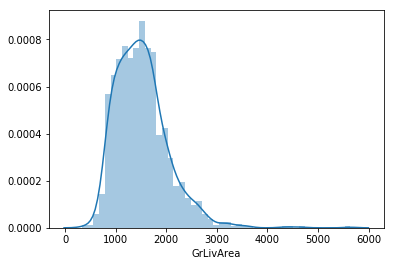

In [34]:
sns.distplot(train['GrLivArea'])

Another positively skewed variable, this can be fixed by using a log transformation.

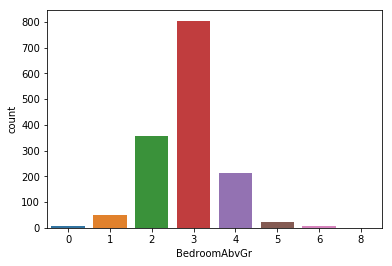

In [43]:
sns.countplot(x='BedroomAbvGr',data=train)

Most houses have between 2-4 rooms, supporting the traditional American family with 1-3 children.

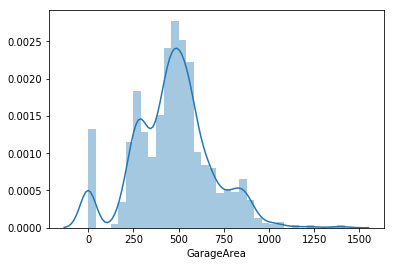

In [44]:
sns.distplot(train['GarageArea'])

Ok, now onto bivariate analysis. I'm going to first convert the categorical variables into dummies using pd.get_dummies and calculate the correlations of these variables with log(SalePrice). For the top 5 variables, I'm going to plot a scatter matrix with log(SalePrice). 

While I suppose using correlaiton to measure the importance of categorical variables is not entirely correct, I think that it shouldn't matter too much considering that the DGP is probably quite linear.

In [18]:
logprice = np.log(train['SalePrice'])

X_train = train.drop('SalePrice', axis=1)
strings = X_train.select_dtypes(include='object')
numerics = X_train.select_dtypes(exclude='object')
dummies = pd.get_dummies(strings)

X_train = pd.concat([numerics, dummies], axis=1)

In [21]:
logprice = train['SalePrice']

In [28]:
corrs = abs(X_train.corrwith(logprice)).sort_values(ascending=False)
print(corrs)

OverallQual            0.817184
GrLivArea              0.700927
GarageCars             0.680625
GarageArea             0.650888
TotalBsmtSF            0.612134
1stFlrSF               0.596981
ExterQual_TA           0.595881
FullBath               0.594771
YearBuilt              0.586570
YearRemodAdd           0.565608
GarageYrBlt            0.541073
KitchenQual_TA         0.538237
TotRmsAbvGrd           0.534422
Foundation_PConc       0.530840
ExterQual_Gd           0.509675
Fireplaces             0.489449
BsmtQual_TA            0.477611
HeatingQC_Ex           0.466706
BsmtQual_Ex            0.463991
BsmtFinType1_GLQ       0.440763
GarageFinish_Unf       0.432011
MasVnrArea             0.428717
GarageFinish_Fin       0.418881
GarageType_Attchd      0.415787
KitchenQual_Ex         0.413936
KitchenQual_Gd         0.406601
MSSubClass_60          0.401500
MasVnrType_None        0.392675
GarageType_Detchd      0.388638
BsmtFinSF1             0.372023
                         ...   
Conditio

Here I've taken the absolute values of the correlations as I don't care whether or not the variable has a positive or negative relationship with logprice, just a strong one. OverallQual is easily of greatest importance. Now for the scatterplots.

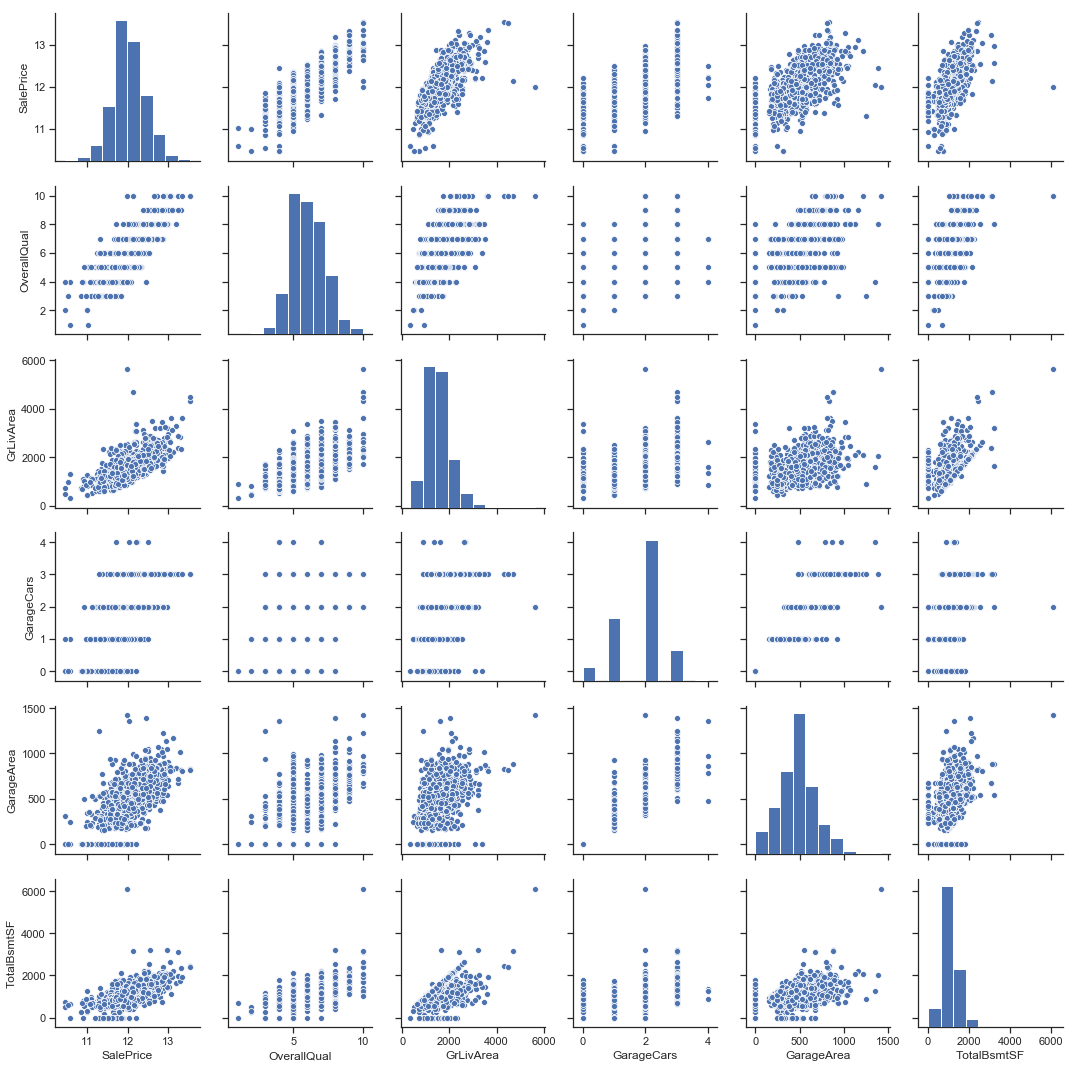

In [34]:
df_temp = pd.concat([logprice,
                    train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']]],axis=1)
sns.pairplot(df_temp)

Now that we have finished our exploratory data analysis, we'll move on to the modelling part.